In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("combined23.csv")

In [2]:
watchTimes = df["WatchTimeStamp"]
esenseTimes = df["Esense TimeStamp"]

In [6]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('combined23.csv')

# Convert 'WatchTimeStamp' and 'Esense TimeStamp' to datetime objects
# 'errors='coerce'' will turn any unparseable dates into NaT (Not a Time)
df['WatchTimeStamp'] = pd.to_datetime(df['WatchTimeStamp'], errors='coerce')
df['Esense TimeStamp'] = pd.to_datetime(df['Esense TimeStamp'], errors='coerce')

# Calculate the absolute difference between the timestamps
# This will result in a Series of Timedelta objects
time_differences = abs(df['WatchTimeStamp'] - df['Esense TimeStamp'])

# Convert Timedelta objects to a numeric unit (e.g., seconds or milliseconds) for averaging.
# Let's convert to seconds for readability.
# If you need milliseconds, use .dt.total_seconds() * 1000
time_differences_seconds = time_differences.dt.total_seconds()

# Compute the mean of these numeric differences, automatically ignoring NaNs
mean_difference_seconds = time_differences_seconds.mean()

print(f"\nMean of the absolute time differences (in seconds): {mean_difference_seconds}")


Mean of the absolute time differences (in seconds): 0.04175308641975309


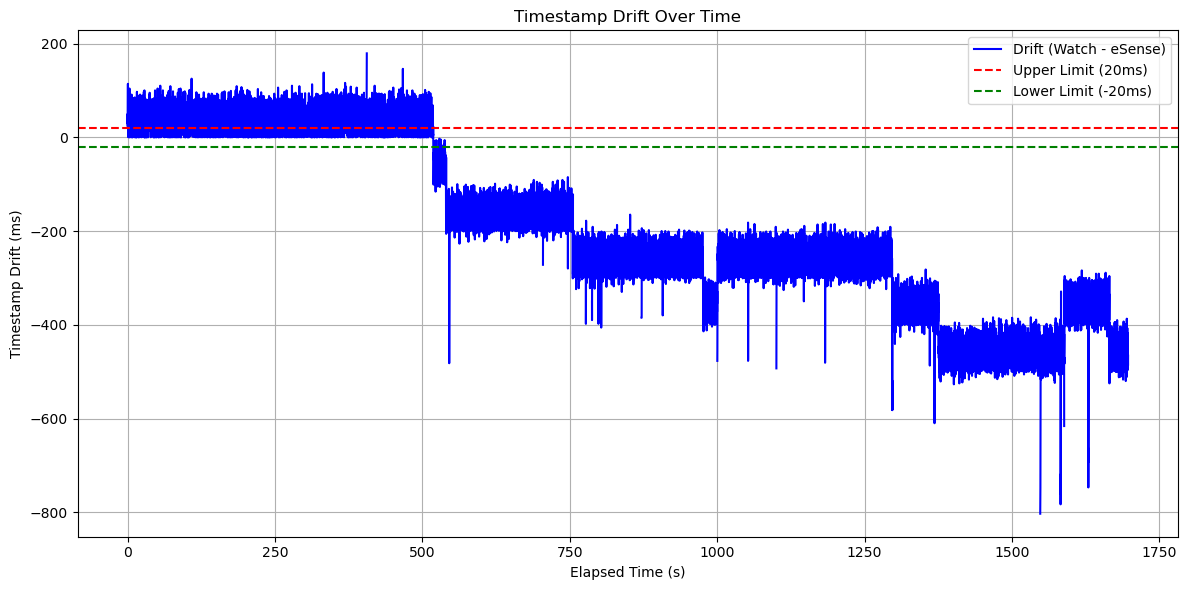

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("combined6_with_timediff.csv")

# Convert timestamp strings to datetime objects
df['WatchTimeStamp'] = pd.to_datetime(df['WatchTimeStamp'])
df['Esense TimeStamp'] = pd.to_datetime(df['Esense TimeStamp'])

# Compute time difference in milliseconds
df['timeDiff'] = (df['WatchTimeStamp'] - df['Esense TimeStamp']).dt.total_seconds() * 1000  # convert to ms

# Compute elapsed time in seconds from start of session
df['ElapsedTime'] = (df['WatchTimeStamp'] - df['WatchTimeStamp'].iloc[0]).dt.total_seconds()

# Plot the drift
plt.figure(figsize=(12, 6))
plt.plot(df['ElapsedTime'], df['timeDiff'], label="Drift (Watch - eSense)", color="blue")
plt.axhline(y=20, color='r', linestyle='--', label="Upper Limit (20ms)")
plt.axhline(y=-20, color='g', linestyle='--', label="Lower Limit (-20ms)")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Timestamp Drift (ms)")
plt.title("Timestamp Drift Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import plotly.express as px

# Load the CSV
df = pd.read_csv("combined6_with_timediff.csv")

# Convert timestamp strings to datetime objects
df['WatchTimeStamp'] = pd.to_datetime(df['WatchTimeStamp'])
df['Esense TimeStamp'] = pd.to_datetime(df['Esense TimeStamp'])

# Compute drift in milliseconds
df['timeDiff'] = (df['WatchTimeStamp'] - df['Esense TimeStamp']).dt.total_seconds() * 1000

# Compute elapsed time in seconds
df['ElapsedTime'] = (df['WatchTimeStamp'] - df['WatchTimeStamp'].iloc[0]).dt.total_seconds()

# Create interactive plot
fig = px.line(
    df,
    x='ElapsedTime',
    y='timeDiff',
    title='Interactive Timestamp Drift (Watch - eSense)',
    labels={'ElapsedTime': 'Elapsed Time (s)', 'timeDiff': 'Drift (ms)'}
)

# Add drift threshold lines
fig.add_hline(y=20, line_dash="dash", line_color="red", annotation_text="20ms")
fig.add_hline(y=-20, line_dash="dash", line_color="green", annotation_text="-20ms")

# Show interactive chart
fig.write_html("timestamp_drift_plot.html")


In [9]:
df['timeDiff'].mean

<bound method Series.mean of 0         40.0
1         30.0
2         50.0
3         23.0
4         59.0
         ...  
16934   -418.0
16935   -495.0
16936   -478.0
16937   -487.0
16938   -466.0
Name: timeDiff, Length: 16939, dtype: float64>

In [1]:
import pandas as pd

# Load the cleaned CSV
df = pd.read_csv("combinedwoBuffer3.csv")

# Convert timestamp columns to datetime
df["WatchTimeStamp"] = pd.to_datetime(df["WatchTimeStamp"])
df["Esense TimeStamp"] = pd.to_datetime(df["Esense TimeStamp"])

# Calculate time difference in seconds
df["timedifference"] = (df["WatchTimeStamp"] - df["Esense TimeStamp"]).dt.total_seconds()

# Save to a new CSV file
df.to_csv("combinedwoBuffer3_with_diff.csv", index=False)


In [1]:
import pandas as pd
import numpy as np

In [2]:
random = pd.read_csv("random.csv")
random.head()

,id,AcualTime,WatchTime,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz
0,0,2025-07-03 16:42:13.627,2025-07-03T16:42:13.189876,-2.916138,-2.504335,8.868123,-0.067195,0.000000,0.004887,-0.78,-35.520000,-15.599999
1,1,2025-07-03 16:42:13.722,2025-07-03T16:42:13.189876,-2.916138,-2.504335,8.868123,-0.067195,0.000000,0.004887,-0.78,-35.520000,-15.599999
2,2,2025-07-03 16:42:13.823,2025-07-03T16:42:13.389785,-2.786851,-2.535460,8.461109,-0.008552,0.106291,0.020769,-0.42,-34.259998,-14.880000
3,3,2025-07-03 16:42:13.925,2025-07-03T16:42:13.490017,-3.153164,-2.585738,8.724471,0.001222,0.073304,0.058643,-0.06,-33.899998,-15.179999
4,4,2025-07-03 16:42:14.025,2025-07-03T16:42:13.589904,-3.014300,-2.643199,8.906430,0.039095,0.002443,0.112399,0.00,-33.840000,-15.059999


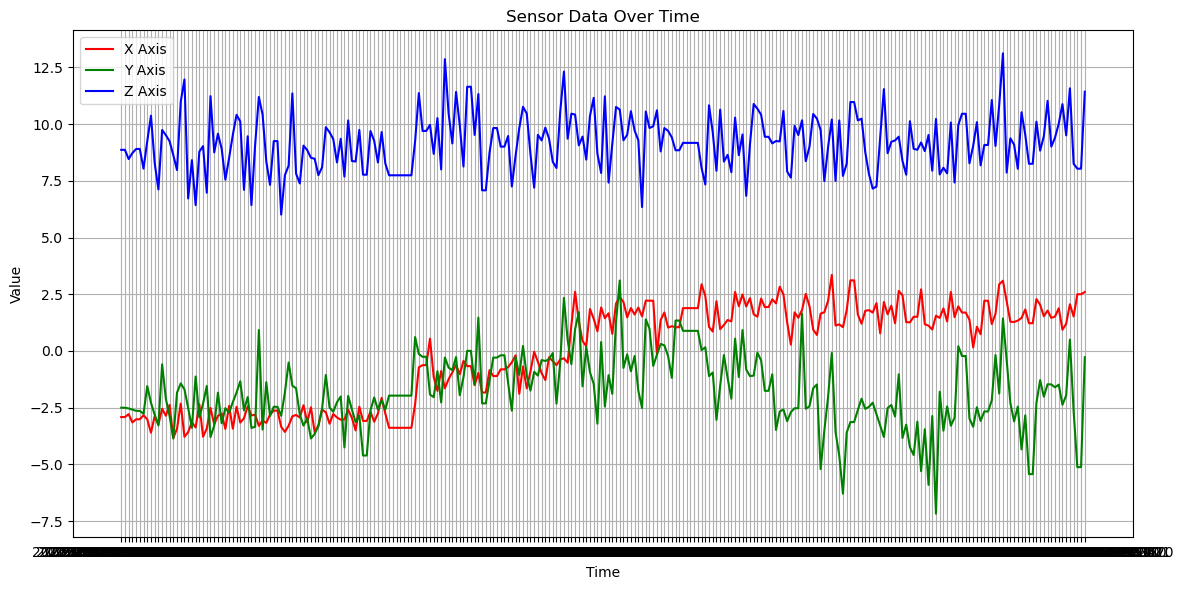

In [5]:
import matplotlib.pyplot as plt
time = "AcualTime"
plt.figure(figsize=(12, 6))
plt.plot(random[time], random['Ax'], label='X Axis', color='r')
plt.plot(random[time], random['Ay'], label='Y Axis', color='g')
plt.plot(random[time], random['Az'], label='Z Axis', color='b')

plt.title('Sensor Data Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


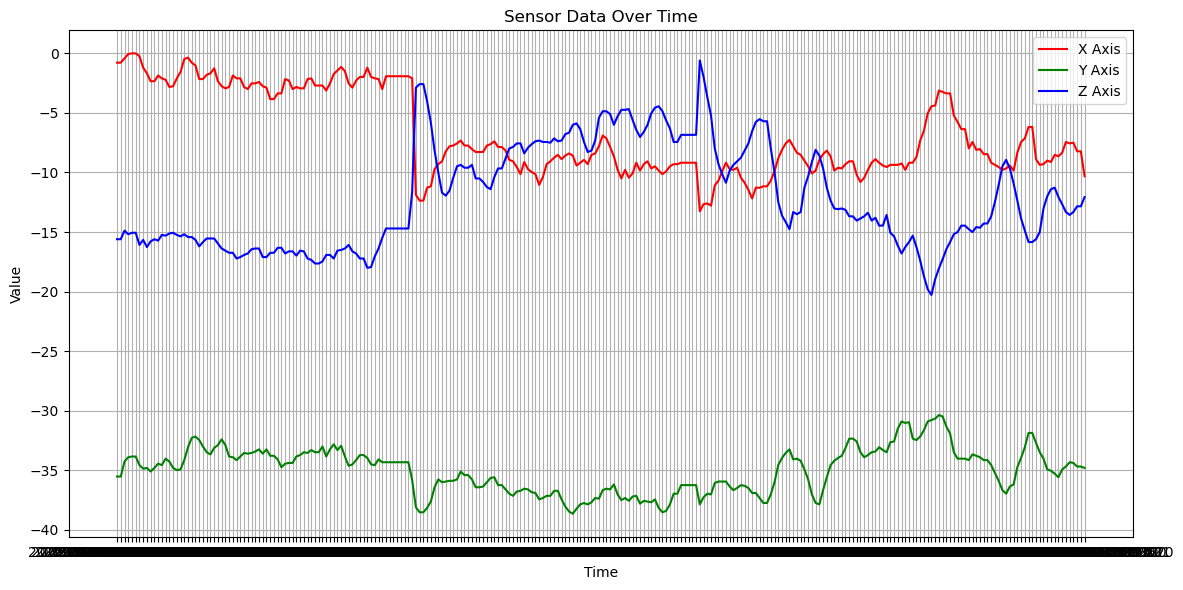

In [6]:



time = "AcualTime"
plt.figure(figsize=(12, 6))
plt.plot(random[time], random['Mx'], label='X Axis', color='r')
plt.plot(random[time], random['My'], label='Y Axis', color='g')
plt.plot(random[time], random['Mz'], label='Z Axis', color='b')

plt.title('Sensor Data Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

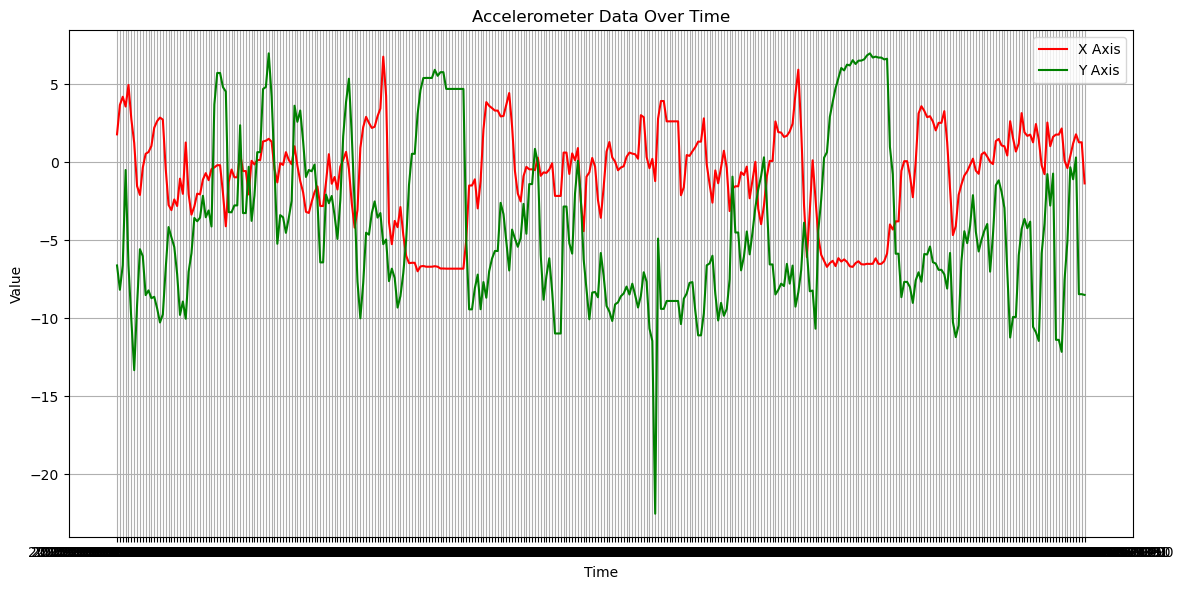

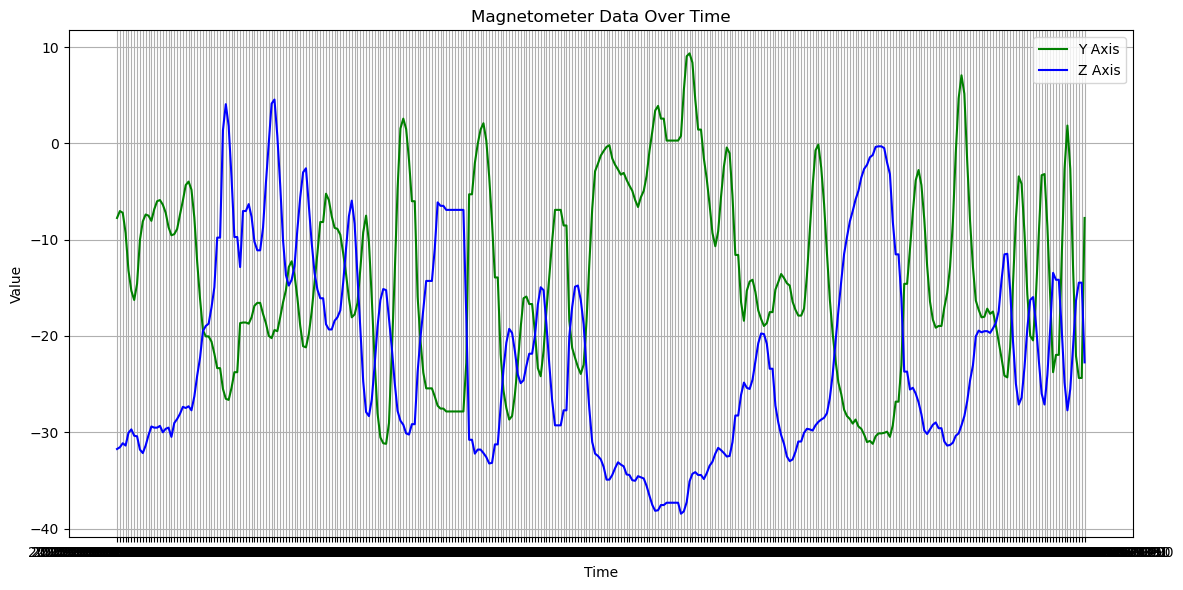

In [13]:
drinking = pd.read_csv("drinking.csv")
random.head()

time = "AcualTime"
plt.figure(figsize=(12, 6))
plt.plot(drinking[time], drinking['Ax'], label='X Axis', color='r')
plt.plot(drinking[time], drinking['Ay'], label='Y Axis', color='g')
# plt.plot(drinking[time], drinking['Az'], label='Z Axis', color='b')

plt.title('Accelerometer Data Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
# plt.plot(drinking[time], drinking['Mx'], label='X Axis', color='r')
plt.plot(drinking[time], drinking['My'], label='Y Axis', color='g')
plt.plot(drinking[time], drinking['Mz'], label='Z Axis', color='b')

plt.title('Magnetometer Data Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

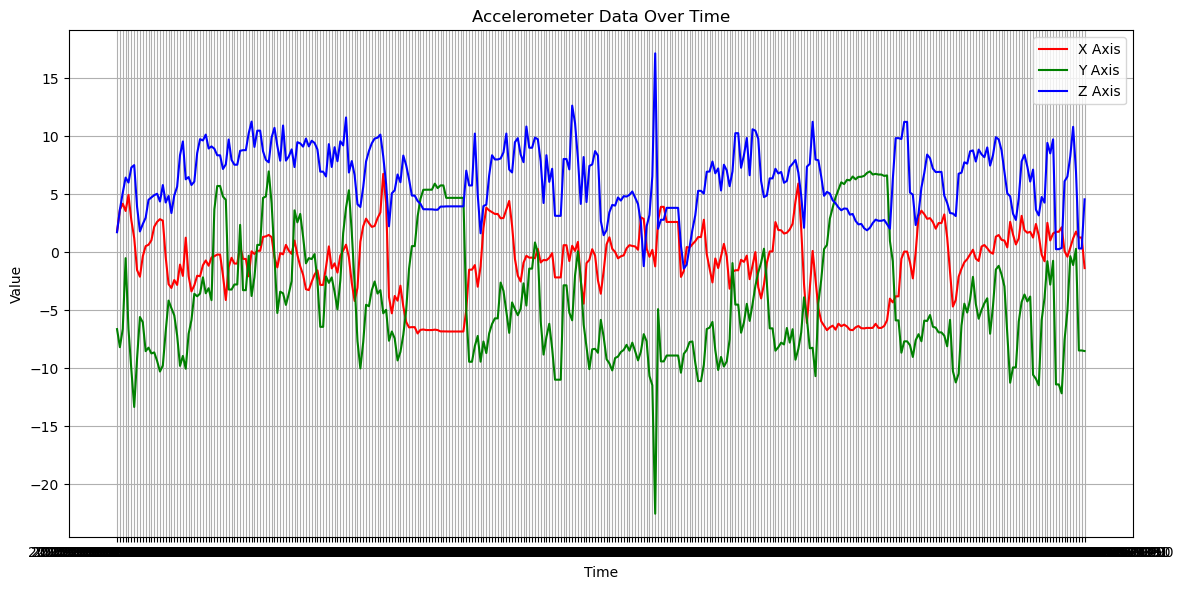

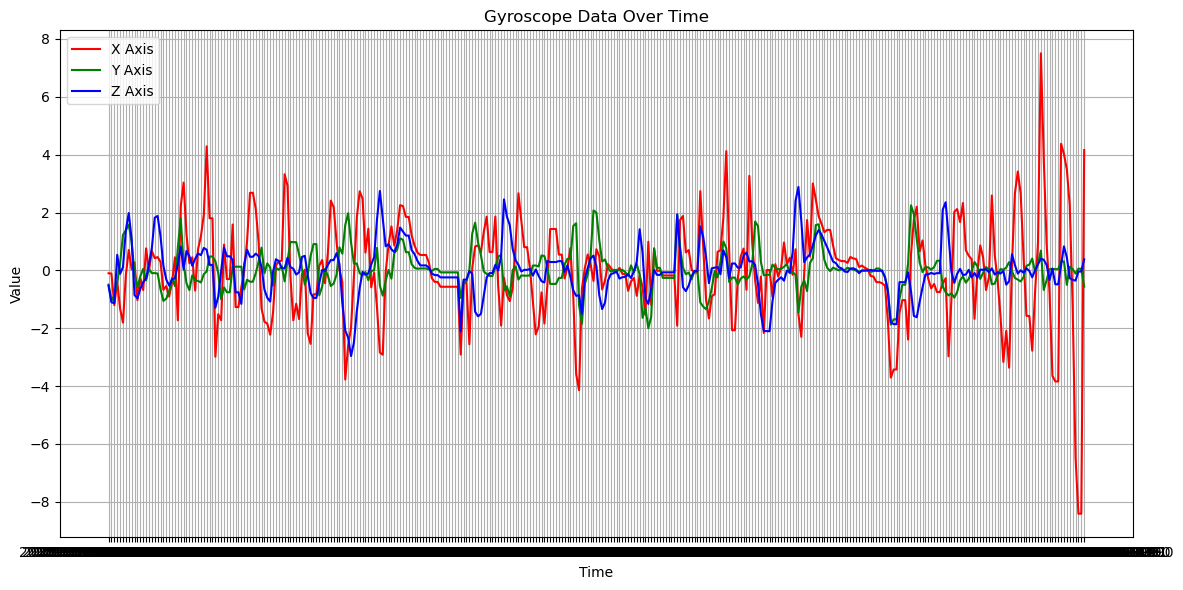

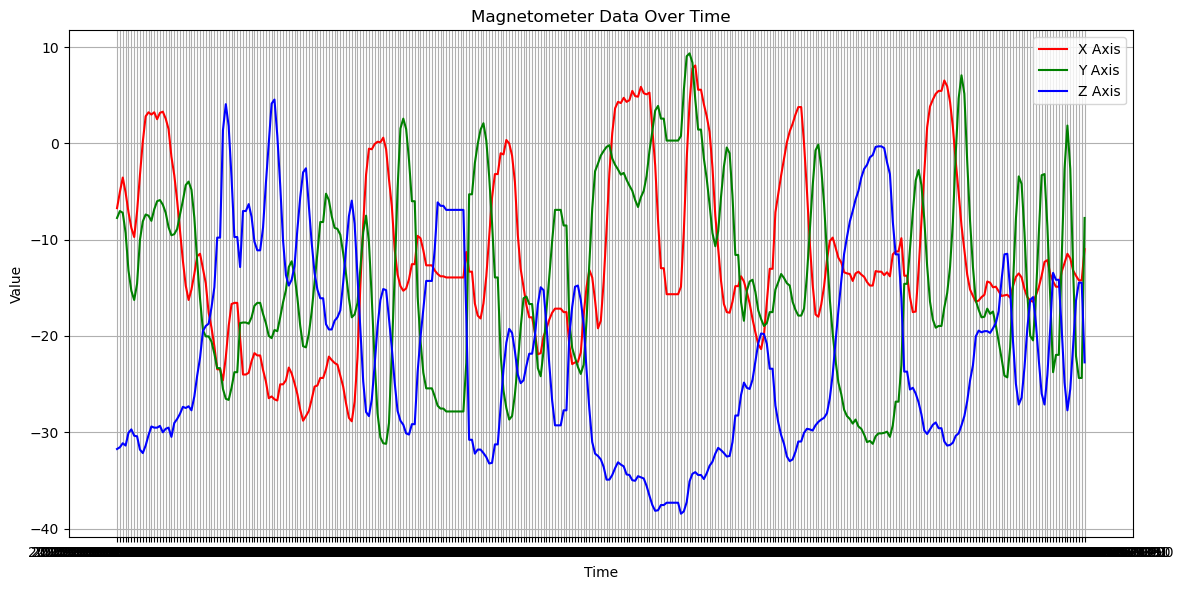

In [17]:
drinking = pd.read_csv("drinking.csv")
random.head()

time = "AcualTime"
plt.figure(figsize=(12, 6))
plt.plot(drinking[time], drinking['Ax'], label='X Axis', color='r')
plt.plot(drinking[time], drinking['Ay'], label='Y Axis', color='g')
plt.plot(drinking[time], drinking['Az'], label='Z Axis', color='b')

plt.title('Accelerometer Data Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(drinking[time], drinking['Gx'], label='X Axis', color='r')
plt.plot(drinking[time], drinking['Gy'], label='Y Axis', color='g')
plt.plot(drinking[time], drinking['Gz'], label='Z Axis', color='b')

plt.title('Gyroscope Data Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(drinking[time], drinking['Mx'], label='X Axis', color='r')
plt.plot(drinking[time], drinking['My'], label='Y Axis', color='g')
plt.plot(drinking[time], drinking['Mz'], label='Z Axis', color='b')

plt.title('Magnetometer Data Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# load_model.py
import torch
import torch.nn as nn

# 1) Load the raw state-dict (CPU by default)
state = torch.load("model_Final.pt", map_location="cpu")

# 2) Print for your inspection
print("=== state_dict keys and shapes ===")
for k, v in state.items():
    print(f"{k:30s} → {tuple(v.shape)}")
print()

# 3) Infer the dims straight from the dict:
input_size  = state['input_fc.weight'].shape[1]
hidden_size = state['input_fc.weight'].shape[0]
# detect how many LSTM layers you have
lstm_layers = { int(k.split('_l')[1].split('.')[0])
                for k in state
                if k.startswith('lstm.weight_ih_l') }
num_layers  = max(lstm_layers) + 1
num_classes = state['classifier.weight'].shape[0]
window_len  = 50   # your sequence length

print(f"input_size={input_size}, hidden_size={hidden_size}, "
      f"num_layers={num_layers}, num_classes={num_classes}")

# 4) Re-define the same architecture
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super().__init__()
        self.input_fc   = nn.Linear(input_size, hidden_size)
        self.lstm       = nn.LSTM(hidden_size, hidden_size,
                                  num_layers=num_layers,
                                  batch_first=True)
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        x, _ = self.lstm(self.input_fc(x))  # → (batch, seq_len, hidden)
        return self.classifier(x[:, -1, :])  # last time-step → (batch, num_classes)

# 5) Instantiate, load, move to device
model = MyModel(input_size, hidden_size, num_layers, num_classes)
model.load_state_dict(state)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 6) Dummy inference
dummy = torch.randn(1, window_len, input_size, device=device)
with torch.no_grad():
    out = model(dummy)

print("→ Dummy output shape:", tuple(out.shape))
print("→ Dummy output tensor:", out.cpu().numpy())


=== state_dict keys and shapes ===
hand_weight                    → ()
head_weight                    → ()
input_fc.weight                → (32, 12)
input_fc.bias                  → (32,)
lstm.weight_ih_l0              → (256, 32)
lstm.weight_hh_l0              → (256, 64)
lstm.bias_ih_l0                → (256,)
lstm.bias_hh_l0                → (256,)
lstm.weight_ih_l1              → (256, 64)
lstm.weight_hh_l1              → (256, 64)
lstm.bias_ih_l1                → (256,)
lstm.bias_hh_l1                → (256,)
classifier.weight              → (12, 64)
classifier.bias                → (12,)

input_size=12, hidden_size=32, num_layers=2, num_classes=12


RuntimeError: Error(s) in loading state_dict for MyModel:
	Unexpected key(s) in state_dict: "hand_weight", "head_weight". 
	size mismatch for lstm.weight_ih_l0: copying a param with shape torch.Size([256, 32]) from checkpoint, the shape in current model is torch.Size([128, 32]).
	size mismatch for lstm.weight_hh_l0: copying a param with shape torch.Size([256, 64]) from checkpoint, the shape in current model is torch.Size([128, 32]).
	size mismatch for lstm.bias_ih_l0: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for lstm.bias_hh_l0: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for lstm.weight_ih_l1: copying a param with shape torch.Size([256, 64]) from checkpoint, the shape in current model is torch.Size([128, 32]).
	size mismatch for lstm.weight_hh_l1: copying a param with shape torch.Size([256, 64]) from checkpoint, the shape in current model is torch.Size([128, 32]).
	size mismatch for lstm.bias_ih_l1: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for lstm.bias_hh_l1: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for classifier.weight: copying a param with shape torch.Size([12, 64]) from checkpoint, the shape in current model is torch.Size([12, 32]).

In [11]:
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super().__init__()
        self.input_fc   = nn.Linear(input_size, hidden_size)
        self.lstm       = nn.LSTM(hidden_size, hidden_size,
                                  num_layers=num_layers,
                                  batch_first=True)
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        x, _ = self.lstm(self.input_fc(x))
        return self.classifier(x[:, -1, :])  # take last time-step


In [14]:
import numpy as np

df = pd.read_csv("input_data.csv")

# 2) Turn it into a float32 numpy array
data = df.values.astype(np.float32)

# 3) Wrap into a batch of size=1: shape becomes (1, seq_len, num_features)
x = torch.from_numpy(data).unsqueeze(0)

# 4) Run it through the model
model.eval()
with torch.no_grad():
    logits = model(x)               # → (1, num_classes)
    probs  = torch.softmax(logits, dim=-1)
    pred   = torch.argmax(probs, dim=-1).item()

# 5) Inspect
print("Logits: ", logits.numpy())
print("Probs:  ", probs.numpy())
print("Predicted class index:", pred)


Logits:  [[ 0.06607945  0.18842965 -0.01387312 -0.18042776 -0.18162042  0.35639352
  -0.51082486  0.01496124 -0.13690825  0.10514878 -0.01020254 -0.01625236]]
Probs:   [[0.08954371 0.1011978  0.08266319 0.06998072 0.0698973  0.11970627
  0.05029082 0.08508142 0.07309348 0.09311137 0.08296716 0.08246674]]
Predicted class index: 5


In [17]:
# assume `probs` is your tensor of shape (1,12)

labels = {
    0: "Sitting + Typing on Desk",
    1: "Sitting + Taking Notes", 
    2: "Standing + Writing on Whiteboard",
    3: "Standing + Erasing Whiteboard",
    4: "Sitting + Talking + Waving Hands",
    5: "Standing + Talking + Waving Hands",
    6: "Sitting + HeadNodding",
    7: "Sitting + Drinking Water",
    8: "Sitting + Drinking Coffee",
    9: "Standing + Drinking Water",
    10: "Standing + Drinking Coffee",
    11: "Scrolling on Phone",
}
topk = torch.topk(probs, k=3, dim=-1)
print("Top-3 indices:", topk.indices.numpy())
print("Top-3 probabilities:", topk.values.numpy())
for idx, p in zip(topk.indices[0], topk.values[0]):
    print(f"  → class {idx} ({labels[idx]}): {p:.2%}")


Top-3 indices: [[5 1 9]]
Top-3 probabilities: [[0.11970627 0.1011978  0.09311137]]


KeyError: tensor(5)

In [18]:
import torch

# 1) Define your probs tensor (1×12), e.g. from your model:
#    (here I’m just re-typing your example)
probs = torch.tensor([[ 
    0.08954371, 0.1011978,  0.08266319, 0.06998072,
    0.0698973,  0.11970627, 0.05029082, 0.08508142,
    0.07309348, 0.09311137, 0.08296716, 0.08246674
]], dtype=torch.float32)

# 2) Put your labels in a list (so labels[i] gives you the name for class i)
labels = [
    "Sitting + Typing on Desk",
    "Sitting + Taking Notes", 
    "Standing + Writing on Whiteboard",
    "Standing + Erasing Whiteboard",
    "Sitting + Talking + Waving Hands",
    "Standing + Talking + Waving Hands",
    "Sitting + HeadNodding",
    "Sitting + Drinking Water",
    "Sitting + Drinking Coffee",
    "Standing + Drinking Water",
    "Standing + Drinking Coffee",
    "Scrolling on Phone",
]

# 3) Grab the top-3 in one go
#    topk returns (values, indices)
top_vals, top_idxs = torch.topk(probs, k=3, dim=1)

# 4) Print them out
for vals, idxs in zip(top_vals, top_idxs):
    print("Top-3 predictions:")
    for p, i in zip(vals.tolist(), idxs.tolist()):
        print(f"  → class {i} ({labels[i]}): {p*100:.2f}%")


Top-3 predictions:
  → class 5 (Standing + Talking + Waving Hands): 11.97%
  → class 1 (Sitting + Taking Notes): 10.12%
  → class 9 (Standing + Drinking Water): 9.31%


In [ ]:
def preprocess_csv(input_path: str, output_path: str) -> pd.DataFrame:
    """
    Loads a CSV with the specified headers, drops unwanted columns,
    and writes the cleaned data to a new CSV.

    Parameters:
    - input_path:  Path to the raw CSV.
    - output_path: Path where the cleaned CSV will be saved.

    Returns:
    - The cleaned DataFrame.
    """
    # Adjust delimiter if your CSV uses tabs or commas
    df = pd.read_csv(input_path, sep='\t')
    
    # Columns to remove
    cols_to_drop = [
        'id',
        'ActualTime',
        'Time in Epochs (ignore)',
        'combined_action_num'
    ]
    
    # Drop and save
    cleaned = df.drop(columns=cols_to_drop[1])
    cleaned.to_csv(output_path, index=False)
    return cleaned


In [39]:
import pandas as pd, torch

df = pd.read_csv("input.csv")
# drop id, ActualTime, Time in Epochs, combined_action_num here
features = df.drop(columns=["id","ActualTime","Time in Epochs (ignore)","combined_action_num"]).values.astype(np.float32)
# features.shape == (N, 12)

# for a sliding window ending at row i:
window = features[i-19:i+1]              # shape (20,12)
x = torch.from_numpy(window).unsqueeze(0) # → (1,20,12)
sh1 = x[:, :, :6]                         # watch stream
sh2 = x[:, :, 6:]                         # esense stream

model = Model(num_classes=12)
model.load_state_dict(torch.load("model_fingers_40.pth"))
model.eval()
with torch.no_grad():
    logits = model(sh1, sh2)              # (1,12)
    probs  = torch.softmax(logits, dim=1) # only if you removed Softmax from forward
    pred   = torch.argmax(probs, dim=1).item()
print("Predicted class:", pred)


KeyError: "['id', 'ActualTime', 'Time in Epochs (ignore)', 'combined_action_num'] not found in axis"

In [35]:
import torch

# 1) Define your probs tensor (1×12), e.g. from your model:
#    (here I’m just re-typing your example)
probs = torch.tensor([[ 
0.09296077, 0.101898 ,  0.09117517 ,0.06766637 ,0.07629789 ,0.12085833,
  0.05132079, 0.08173214, 0.07125255, 0.09166999, 0.07618263, 0.07698539]], dtype=torch.float32)

# 2) Put your labels in a list (so labels[i] gives you the name for class i)
labels = [
    "Sitting + Typing on Desk",
    "Sitting + Taking Notes", 
    "Standing + Writing on Whiteboard",
    "Standing + Erasing Whiteboard",
    "Sitting + Talking + Waving Hands",
    "Standing + Talking + Waving Hands",
    "Sitting + HeadNodding",
    "Sitting + Drinking Water",
    "Sitting + Drinking Coffee",
    "Standing + Drinking Water",
    "Standing + Drinking Coffee",
    "Scrolling on Phone",
]

# 3) Grab the top-3 in one go
#    topk returns (values, indices)
top_vals, top_idxs = torch.topk(probs, k=3, dim=1)

# 4) Print them out
for vals, idxs in zip(top_vals, top_idxs):
    print("Top-3 predictions:")
    for p, i in zip(vals.tolist(), idxs.tolist()):
        print(f"  → class {i} ({labels[i]}): {p*100:.2f}%")


Top-3 predictions:
  → class 5 (Standing + Talking + Waving Hands): 12.09%
  → class 1 (Sitting + Taking Notes): 10.19%
  → class 0 (Sitting + Typing on Desk): 9.30%


In [62]:
import pandas as pd
import torch

# 1) Read & drop the columns you don’t want
df = pd.read_csv("standingwater.csv")

# 2) Convert to a NumPy array of shape (N,12), then to a Torch tensor of shape (1,N,12)
data = df.values.astype("float32")          # → (N,12)
x    = torch.from_numpy(data).unsqueeze(0)  # → (1,N,12)

# 3) Split into your two streams
sh1 = x[:, :, :6]   # watch data
sh2 = x[:, :, 6:]   # esense data

# 4) Define your Model exactly as it was saved
class Model(torch.nn.Module):
    def __init__(self, num_classes=12):
        super().__init__()
        self.fl1d    = torch.nn.Linear(12, 32)
        self.lstm        = torch.nn.LSTM(32, 64, num_layers=2, batch_first=True)
        self.fc  = torch.nn.Linear(64, num_classes)
        # these were saved as scalars in your checkpoint
        self.hand_weight = torch.nn.Parameter(torch.tensor(1.0))
        self.head_weight = torch.nn.Parameter(torch.tensor(1.0))

    def forward(self, s1, s2):
        sd = torch.cat((self.hand_weight * s1, self.head_weight * s2), dim=2)
        x  = self.fl1d(sd)
        y, _ = self.lstm(x)
        out = self.fc(y[:, -1, :])
        return torch.nn.functional.softmax(out, dim=1)

# 5) Load the checkpoint
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = Model(num_classes=12).to(device)
state  = torch.load("model_new.pt", map_location=device)
model.load_state_dict(state)
model.eval()

# 6) Run your forward pass
with torch.no_grad():
    probs = model(sh1.to(device), sh2.to(device))   # → (1,12)
    pred  = torch.argmax(probs, dim=1).item()

print("Predicted class index:", pred)


Predicted class index: 1


In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, num_classes):
        super(Model, self).__init__()
        # must match checkpoint keys:
        self.input_fc    = nn.Linear(12, 32)
        self.lstm        = nn.LSTM(input_size=32, hidden_size=64,
                                   num_layers=2, batch_first=True)
        self.classifier  = nn.Linear(64, num_classes)
        # make these true scalars, not 1-element tensors
        self.hand_weight = nn.Parameter(torch.tensor(1.0))
        self.head_weight = nn.Parameter(torch.tensor(1.0))

    def forward(self, sh1, sh2):
        sd_hand = self.hand_weight * sh1
        sd_head = self.head_weight * sh2
        sd      = torch.cat((sd_hand, sd_head), dim=2)
        sd      = self.input_fc(sd)
        lstm_out, _ = self.lstm(sd)
        final_output = lstm_out[:, -1, :]
        logits  = self.classifier(final_output)
        return F.softmax(logits, dim=1)


In [68]:
import onnx
dummy_s1 = torch.randn(1,50,6)
dummy_s2 = torch.randn(1,50,6)
torch.onnx.export(model, (dummy_s1, dummy_s2), "model.onnx",
                  input_names=["s1","s2"], output_names=["out"],
                  dynamic_axes={"s1":{1:"T"},"s2":{1:"T"},"out":{1:"C"}})


ModuleNotFoundError: No module named 'onnx'